In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd
from skipper import observe

In [3]:
plt.rcParams['font.size']=20

sys.path.append('../scripts')

import make_pointings
import sigjson_f2021b

import datetime
import pytz

In [4]:
ctio = observe.ObservingSite ()

In [9]:
oiii_pointings = sigjson_f2021b.load_mastercat_cosmos ()
halpha_pointings = sigjson_f2021b.load_mastercat_cosmos ( '../pointings/S2021A.csv')
all_pointings = np.concatenate([oiii_pointings.index, halpha_pointings.index])

In [12]:
tele = pd.read_csv('/Users/kadofong/Downloads/tele20211130.csv')
coo = observe.CopilotOutput ('/Users/kadofong/Downloads/db_merian.fits',
                            pointings=all_pointings)
reobs = coo.flag_for_reobservation ( )

# Predict GAMA/COSMOS coverage in F2021B

In [13]:
datelist_2021b_n536 = [(2021,12,31), (2021,1,1)]
datelist_2021b_n536 += [(2021,1,ix) for ix in np.arange(3,5)]
datelist_2021b_n536 += [(2021,1,ix) for ix in np.arange(6,8)]
datelist_2021b_n536 += [(2021,1,ix) for ix in np.arange(9,12)]
datelist_2021b_n536 += [(2022,1,ix) for ix in np.arange(25, 32)]
nightslot_2021b_n536 = [2,2]
nightslot_2021b_n536 += [2 for ix in np.arange(3,5)]
nightslot_2021b_n536 += [2 for ix in np.arange(6,8)]
nightslot_2021b_n536 += [2 for ix in np.arange(9,12)]
nightslot_2021b_n536 += [2 for ix in np.arange(25,32)]
priorities_2021b_n536 = {'COSMOS':0, 'GAMA':1}  

In [14]:
fmt = sigjson_f2021b.fmt
et = sigjson_f2021b.et

In [15]:
prior_pointings = pd.DataFrame ( index=all_pointings,
                           columns=['is_queued','qstamp','has_priority'])
prior_pointings['is_queued'] = False
prior_pointings.loc[coo.merian_sidecar['object'], 'is_queued'] = True
prior_pointings.loc[reobs,'is_queued'] = False

In [16]:
prior_pointings['is_queued'].sum()

251

In [17]:
datelist = datelist_2021b_n536
nightslot_l = nightslot_2021b_n536
priorities = priorities_2021b_n536
ocat = observe.ObsCatalog(comment='--', proposer='Leathaud', 
                          propid='2020B-0288', seqid='S2021B')

f2021b_pointings = prior_pointings.reindex(oiii_pointings.index)
for ix,date in enumerate(datelist):
    year, month, day = date        
    night_start, night_end = ctio.get_sunriseset ( year, month, day )
    if nightslot_l[ix] == 0:
        print('[predict] night slot: Full night')
        obs_start = night_start
        obs_end = night_end
    elif nightslot_l[ix] == 1:
        print('[predict] night slot: First half')
        obs_start = night_start
        obs_end = obs_start + 0.5*(night_end-obs_start)
    else:
        print('[predict] night slot: Second half')
        obs_start = night_start + 0.5*(night_end-night_start)
        obs_end = night_end 

    print(f"obsStart: {obs_start.astimezone(ctio.timezone).strftime(fmt)} Santiago")
    print(f"          {obs_start.astimezone(et).strftime(fmt)} ET")
    print(f"          {obs_start.strftime(fmt)} UTC")
    print(f"obsEnd:   {obs_end.astimezone(ctio.timezone).strftime(fmt)} Santiago")
    print(f"          {obs_end.astimezone(et).strftime(fmt)} ET")
    print(f"          {obs_end.strftime(fmt)} UTC")

    f2021b_pointings = ocat.plan_night ( obs_start, ctio, 
                                 catalog=oiii_pointings, 
                                 obs_end=obs_end,
                                 is_queued=f2021b_pointings.copy(),
                                 save=False,
                                 maxairmass=1.5, 
                                 object_priority=priorities )



happy new years
[predict] night slot: Second half
obsStart: 2022/01/01 01:47 AM Santiago
          2021/12/31 11:47 PM ET
          2022/01/01 04:47 AM UTC
obsEnd:   2022/01/01 05:33 AM Santiago
          2022/01/01 03:33 AM ET
          2022/01/01 08:33 AM UTC
Minimum airmass available: 1.3565375321240605
(780s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.2020391998941575

==> 20220101_05, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1503982676515518

==> 20220101_06, 3600.0s available
3600s filled by priority=0.0 objects
0s filled by priority=1.0 objects
Minimum airmass available: 1.1448640650662405

==> 20220101_07, 3600.0s available
3600s filled by priority=0.0 objects
0s filled by priority=1.0 objects
Minimum airmass available: 1.1430156530624465

==> 20220101_08, 7379.999999999971s available
[plan_night] padding the last hour script by 5400.0s
7200s filled by priority=0.0 object

Minimum airmass available: 1.2782229596352026
(510s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.1938323491360556

==> 20210112_05, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1487711758716437

==> 20210112_06, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.161742012511285

==> 20210112_07, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1603652338854806

==> 20210112_08, 7979.999999999958s available
[plan_night] padding the last hour script by 5400.0s
0s filled by priority=0.0 objects
7200s filled by priority=1.0 objects
[predict] night slot: Second half
obsStart: 2022/01/26 01:55 AM Santiago
          2022/01/25 11:55 PM ET
          2022/01/26 04:55 AM UTC
obsEnd:   2022/01/26 05:57 AM Santiago
          2022/01/26 03:57 AM ET
          2022/

Minimum airmass available: 1.146811400662372

==> 20220201_09, 5639.999999999963s available
[plan_night] padding the last hour script by 5400.0s
0s filled by priority=0.0 objects
5400s filled by priority=1.0 objects


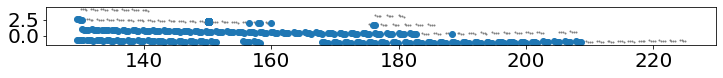

In [18]:
fig = plt.figure(figsize=(12,4))
ax = plt.subplot(111, aspect='equal')
plt.scatter ( 
    oiii_pointings['RA'],
    oiii_pointings['dec'],
    s=1,
    color='grey',
)    
plt.scatter ( 
    oiii_pointings.reindex(f2021b_pointings.query('is_queued').index)['RA'],
    oiii_pointings.reindex(f2021b_pointings.query('is_queued').index)['dec']
)    

In [19]:
prior_pointings.is_queued.sum()

251

In [20]:
prior_pointings.loc[f2021b_pointings.index,'is_queued'] = f2021b_pointings['is_queued']

In [21]:
prior_pointings.is_queued.sum()

582

In [22]:
(508 -251)/len(datelist_2021b_n536) * 15/10
# \\ make sure that this number is ~consistent with the pace of Halpha observations
# \\ we achieved in S2021A, which was about 24 pointings per night

24.09375

# Predict S2022

In [31]:
import re

In [110]:
get_catalog_objects = lambda x: x['object'].str.extract(r'(.*?(?=_))')[0]

In [213]:
halpha_s2022a = pd.read_csv('../pointings/gama_2022A.csv', index_col='object.1')
halpha_s2022a['seqid'] = 'S2022A' # \\ update date


# \\ prioritize objects at high declination
is_high = (halpha_s2022a['dec'] > 1.5)
is_early = (halpha_s2022a['RA'] < 160.)
is_late = (halpha_s2022a['RA'] > 210.)

halpha_s2022a.loc[is_high&~is_early, 'priority_name'] = 'GAMAhigh'
halpha_s2022a.loc[is_early, 'priority_name'] = 'GAMAearly'
halpha_s2022a.loc[is_late, 'priority_name'] = 'GAMAlate'


oiii_s2022a = halpha_s2022a.copy()
oiii_s2022a['filter'] = 'N540'
oiii_s2022a['object'] = [ xo.replace('N708','N540') for xo in oiii_s2022a['object'] ]
oiii_s2022a.index = oiii_s2022a['object']
oiii_s2022a['expTime'] = 900.

halpha_cosmos = halpha_pointings.loc[get_catalog_objects(halpha_pointings)=='COSMOS'].copy()
halpha_cosmos['priority_name'] = 'COSMOS'
halpha_s2022a = pd.concat([halpha_s2022a, halpha_cosmos], sort=False)                                   

oiii_cosmos = oiii_pointings.loc[get_catalog_objects(oiii_pointings)=='COSMOS'].copy()
oiii_cosmos['priority_name'] = 'COSMOS'
oiii_s2022a = pd.concat([oiii_s2022a, oiii_cosmos], sort=False)   

### Predict OIII

In [214]:
dates = [ (2022,2,idx) for idx in range(9,14) ]
dates += [ (2022,3,idx) for idx in range(1,15) ]
dates += [ (2022,3,idx) for idx in range(29,32) ]
dates += [ (2022,4,1) ]
dates = np.asarray(dates)

filters = [ 'N540' for idx in range(9,14) ]
filters += [ 'N708' for idx in range(1,8) ]
filters += [ 'N540' for idx in range(8,15) ]
filters += [ 'N708' for idx in range(29,31) ]
filters += [ 'N540','N540' ]
filters = np.asarray(filters)

slots =  [ 2 for idx in range(9,14) ]
slots += [ 2 for idx in range(1,15) ]
slots += [ 0 for idx in range(29,32) ]
slots += [ 0 ]
slots = np.asarray(slots)

In [215]:
def predict_next ( pointings, datelist, nightslot_l, priorities, is_queued, **kwargs ):
    ocat = observe.ObsCatalog(comment='--', proposer='Leathaud', 
                              propid='2020B-0288', seqid='S2022A')

    for ix,date in enumerate(datelist):
        year, month, day = date        
        night_start, night_end = ctio.get_sunriseset ( year, month, day )
        if nightslot_l[ix] == 0:
            print('[predict] night slot: Full night')
            obs_start = night_start
            obs_end = night_end
        elif nightslot_l[ix] == 1:
            print('[predict] night slot: First half')
            obs_start = night_start
            obs_end = obs_start + 0.5*(night_end-obs_start)
        else:
            print('[predict] night slot: Second half')
            obs_start = night_start + 0.5*(night_end-night_start)
            obs_end = night_end 

        print(f"obsStart: {obs_start.astimezone(ctio.timezone).strftime(fmt)} Santiago")
        print(f"          {obs_start.astimezone(et).strftime(fmt)} ET")
        print(f"          {obs_start.strftime(fmt)} UTC")
        print(f"obsEnd:   {obs_end.astimezone(ctio.timezone).strftime(fmt)} Santiago")
        print(f"          {obs_end.astimezone(et).strftime(fmt)} ET")
        print(f"          {obs_end.strftime(fmt)} UTC")

        is_queued = ocat.plan_night ( obs_start, ctio, 
                                     catalog=pointings, 
                                     obs_end=obs_end,
                                     is_queued=is_queued.copy(),
                                     save=False,
                                     maxairmass=1.5, 
                                     object_priority=priorities, **kwargs )
    return is_queued


#### See output

In [216]:
catalog_objects = oiii_s2022a['object'].str.extract(r'(.*(?=_))')[0]

In [217]:
# prior_s2022a.reindex(oiii_s2022a.index)
is_queued = prior_pointings.reindex(oiii_s2022a.index)
is_queued.loc[is_queued['is_queued'].isna(), 'is_queued'] = False
oiii_predictions = predict_next ( oiii_s2022a, 
                                  dates[filters=='N540'], slots[filters=='N540'],
                                  {'COSMOS':0,'GAMA':3, 'GAMAhigh':2, 'GAMAearly':1, 'GAMAlate':4},
                                  is_queued, pad_last_hour=False )

[predict] night slot: Second half
obsStart: 2022/02/10 01:57 AM Santiago
          2022/02/09 11:57 PM ET
          2022/02/10 04:57 AM UTC
obsEnd:   2022/02/10 06:13 AM Santiago
          2022/02/10 04:13 AM ET
          2022/02/10 09:13 AM UTC
Minimum airmass available: 1.185228741352983
(150s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.14374150592113

==> 20220210_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
Minimum airmass available: 1.1422286034336964

==> 20220210_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
Minimum airmass available: 1.1592148022677633

==> 20220210_07, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s fil

Minimum airmass available: 1.1642488926984595

==> 20220309_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
Minimum airmass available: 1.1588976330754939

==> 20220309_06, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
Minimum airmass available: 1.1444818096051086

==> 20220309_07, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
Minimum airmass available: 1.1457875589811726

==> 20220309_08, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
3600.0s filled 

Minimum airmass available: 1.142417801568292
(420s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.1581180196205454

==> 20220314_05, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
Minimum airmass available: 1.1596019705694867

==> 20220314_06, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
Minimum airmass available: 1.1452005687942206

==> 20220314_07, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
3600.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
Minimum airmass available: 1.1726893616648773

==> 20220314_08, 3600.0s available
0.0s filled by priority=0.

/Users/kadofong/work/merian/skipper/python/skipper/observe.py:398: UserWarning: Queue empty at 20220401_09
  warnings.warn (f'Queue empty at {hstr}')


[predict] night slot: Full night
obsStart: 2022/04/01 08:41 PM Santiago
          2022/04/01 07:41 PM ET
          2022/04/01 11:41 PM UTC
obsEnd:   2022/04/02 06:53 AM Santiago
          2022/04/02 05:53 AM ET
          2022/04/02 09:53 AM UTC
Minimum airmass available: 1.274007850717204

==> 20220401_23, 1139.9999999999898s available
0.0s filled by priority=0.0 objects
900.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
Minimum airmass available: 1.194305354060667

==> 20220402_00, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
Minimum airmass available: 1.1847899147876064

==> 20220402_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority

/Users/kadofong/work/merian/skipper/python/skipper/observe.py:401: UserWarning: Queue unfilled at 20220402_08
  warnings.warn(f'Queue unfilled at {hstr}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:398: UserWarning: Queue empty at 20220402_09
  warnings.warn (f'Queue empty at {hstr}')


In [220]:
new_obs = ~oiii_predictions['qstamp'].isna()
assert not is_queued.loc[new_obs, 'is_queued'].any() # \\ make sure no pointings have been re-queued

In [234]:
oiii_predictions.query('is_queued').shape[0], new_obs.sum()

(610, 279)

In [241]:
slots[filters=='N540'] > 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False])

In [244]:
total_time = (slots[filters=='N540']>0).sum()*.5 + (slots[filters=='N540']==0).sum() # in nights

In [251]:
# we did about 24 exposures per half night in Halpha; 48 exposures per night
new_obs.sum() / total_time * 15. / 10.  # exposures / night 

61.6875

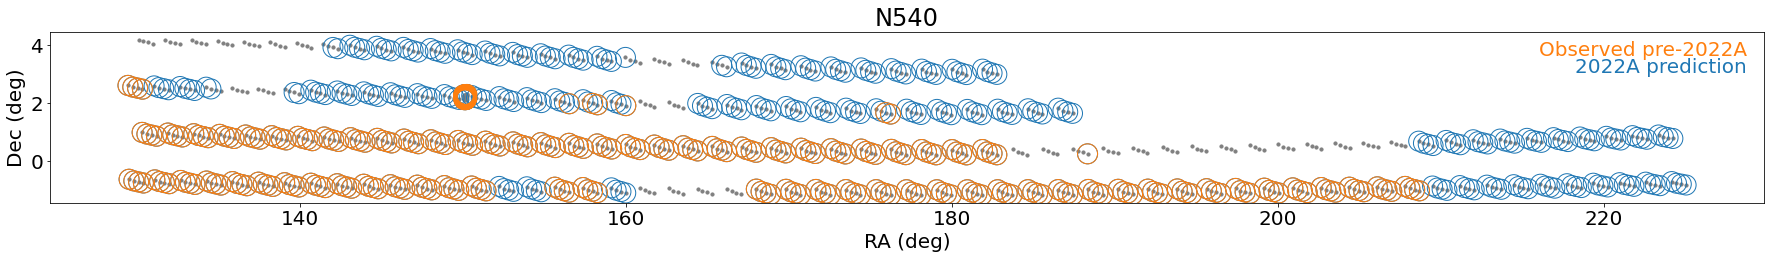

In [221]:
fig = plt.figure(figsize=(25,4))
ax = plt.subplot(111)# aspect='equal')
plt.scatter ( 
    oiii_s2022a['RA'],
    oiii_s2022a['dec'],
    s=10,
    color='grey',
)    
plt.scatter ( 
    oiii_s2022a.reindex(oiii_predictions.query('is_queued').index)['RA'],
    oiii_s2022a.reindex(oiii_predictions.query('is_queued').index)['dec'],
    s=400, ec='C0', fc='None', lw=1
) 

plt.scatter ( 
    oiii_s2022a.reindex(prior_pointings.query('is_queued').index)['RA'],
    oiii_s2022a.reindex(prior_pointings.query('is_queued').index)['dec'],
    s=400, ec='C1', fc='None'
)
ax.text ( 0.99, .95, 'Observed pre-2022A', ha='right', va='top', color='C1', transform=ax.transAxes )
ax.text ( 0.99, .85, '2022A prediction', ha='right', va='top', color='C0', transform=ax.transAxes )
ax.set_xlabel ('RA (deg)')
ax.set_ylabel ('Dec (deg)')
ax.set_title('N540')

#plt.scatter ( oiii_pointings.loc[test, 'RA'], oiii_pointings.loc[test,'dec'], color='r', s=300 )
plt.tight_layout()
plt.savefig('../../figures/2022Aexpanded_N540predictions.png')

### Predict H$\alpha$

#### See output

In [222]:
# prior_pointings.reindex(halpha_s2022a.index)
is_queued = prior_pointings.reindex(halpha_s2022a.index)
is_queued.loc[is_queued['is_queued'].isna(), 'is_queued'] = False
halpha_predictions = predict_next ( halpha_s2022a, 
                                  dates[filters=='N708'], slots[filters=='N708'],
                                  {'COSMOS':0,'GAMA':3, 'GAMAhigh':2, 'GAMAearly':1, 'GAMAlate':4},
                                  is_queued )

[predict] night slot: Second half
obsStart: 2022/03/02 01:55 AM Santiago
          2022/03/01 11:55 PM ET
          2022/03/02 04:55 AM UTC
obsEnd:   2022/03/02 06:32 AM Santiago
          2022/03/02 04:32 AM ET
          2022/03/02 09:32 AM UTC
Minimum airmass available: 1.1436380304334086
(270s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.1421126141748965

==> 20220302_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
Minimum airmass available: 1.1420400452163324

==> 20220302_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
Minimum airmass available: 1.1428730154537299

==> 20220302_07, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s fil

Minimum airmass available: 1.2297849919194082

==> 20220306_09, 5699.999999999965s available
[plan_night] padding the last hour script by 3600.0s
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
5400.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
[predict] night slot: Second half
obsStart: 2022/03/07 01:54 AM Santiago
          2022/03/06 11:54 PM ET
          2022/03/07 04:54 AM UTC
obsEnd:   2022/03/07 06:36 AM Santiago
          2022/03/07 04:36 AM ET
          2022/03/07 09:36 AM UTC
Minimum airmass available: 1.1425952607362728
(330s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.1418679513968593

==> 20220307_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
Minimum airmass available: 1.1421135308604675

==> 20220307_06

/Users/kadofong/work/merian/skipper/python/skipper/observe.py:398: UserWarning: Queue empty at 20220330_08
  warnings.warn (f'Queue empty at {hstr}')


Minimum airmass available: 2.108022727647169

==> 20220330_09, 6660.000000000029s available
[plan_night] padding the last hour script by 3600.0s
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
!!! Nothing to queue !!!


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:398: UserWarning: Queue empty at 20220330_09
  warnings.warn (f'Queue empty at {hstr}')


[predict] night slot: Full night
obsStart: 2022/03/30 08:43 PM Santiago
          2022/03/30 07:43 PM ET
          2022/03/30 11:43 PM UTC
obsEnd:   2022/03/31 06:52 AM Santiago
          2022/03/31 05:52 AM ET
          2022/03/31 09:52 AM UTC
Minimum airmass available: 1.3481533872111937

==> 20220330_23, 1019.9999999999901s available
0.0s filled by priority=0.0 objects
600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
Minimum airmass available: 1.2313327785231105

==> 20220331_00, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=inf objects
Minimum airmass available: 1.2068026808699521

==> 20220331_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priori

/Users/kadofong/work/merian/skipper/python/skipper/observe.py:398: UserWarning: Queue empty at 20220331_08
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:398: UserWarning: Queue empty at 20220331_09
  warnings.warn (f'Queue empty at {hstr}')


In [252]:
new_obs = ~halpha_predictions['qstamp'].isna()
assert not is_queued.loc[new_obs, 'is_queued'].any() # \\ make sure no pointings have been re-queued

In [253]:
halpha_predictions.query('is_queued').shape[0], new_obs.sum()

(580, 329)

In [254]:
total_time = (slots[filters=='N708']>0).sum()*.5 + (slots[filters=='N708']==0).sum() # in nights

In [257]:
# we did about 24 exposures per half night in Halpha; 48 exposures per night
new_obs.sum() / total_time  # exposures / night

59.81818181818182

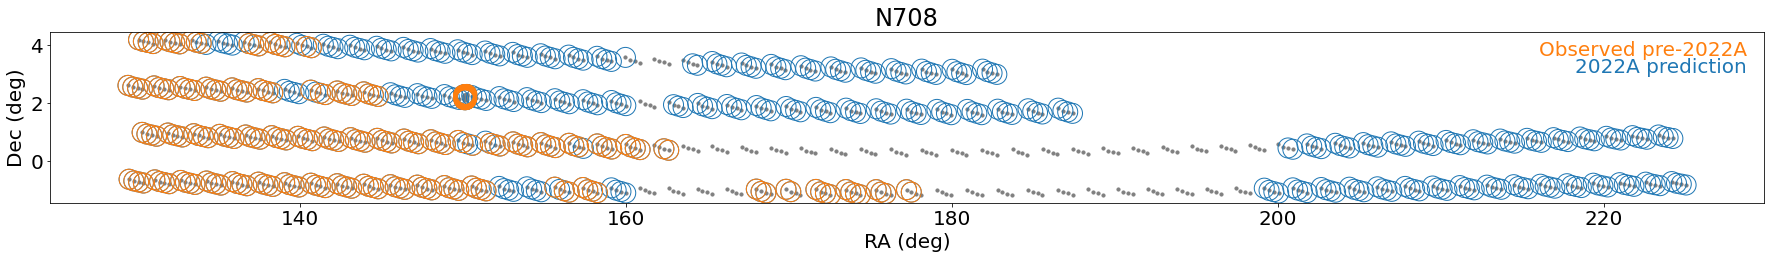

In [225]:
fig = plt.figure(figsize=(25,4))
ax = plt.subplot(111)# aspect='equal')
plt.scatter ( 
    halpha_s2022a['RA'],
    halpha_s2022a['dec'],
    s=10,
    color='grey',
)    
plt.scatter ( 
    halpha_s2022a.reindex(halpha_predictions.query('is_queued').index)['RA'],
    halpha_s2022a.reindex(halpha_predictions.query('is_queued').index)['dec'],
    s=400, ec='C0', fc='None', lw=1
) 
plt.scatter ( 
    halpha_s2022a.reindex(prior_pointings.query('is_queued').index)['RA'],
    halpha_s2022a.reindex(prior_pointings.query('is_queued').index)['dec'],
    s=400, ec='C1', fc='None'
)

ax.text ( 0.99, .95, 'Observed pre-2022A', ha='right', va='top', color='C1', transform=ax.transAxes )
ax.text ( 0.99, .85, '2022A prediction', ha='right', va='top', color='C0', transform=ax.transAxes )
ax.set_xlabel ('RA (deg)')
ax.set_ylabel ('Dec (deg)')

ax.set_title('N708')
plt.tight_layout()
plt.savefig('../../figures/2022Aexpanded_N708predictions.png')

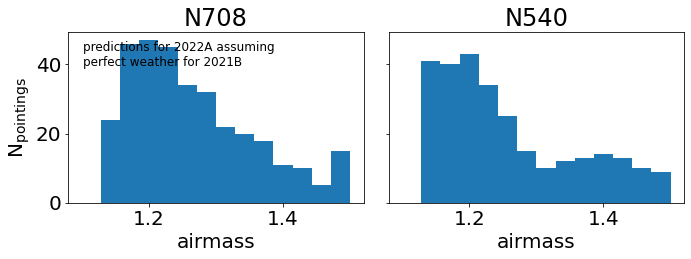

In [227]:
fig, axarr = plt.subplots(1,2,figsize=(10,4), sharey=True)
bins = np.linspace(1.1,1.5,15)
axarr[0].hist ( halpha_predictions['airmass'].dropna(), bins=bins )
axarr[1].hist ( oiii_predictions['airmass'].dropna(), bins=bins )
for ax in axarr:
    ax.set_xlabel('airmass')
axarr[0].set_ylabel(r'$\rm N_{pointings}$')
plt.tight_layout ()

axarr[0].set_title(r'N708')
axarr[1].set_title('N540')
axarr[0].text(.05,.95,'''predictions for 2022A assuming
perfect weather for 2021B''', ha='left',va='top',
             transform=axarr[0].transAxes, fontsize=12)
plt.tight_layout ()
plt.savefig('../../figures/2022A_airmass_predictions.png')